In [35]:
import pandas as pd

# Importando o conjunto de dados
df = pd.read_csv('dadosacoes.csv')

# Exibindo as primeiras linhas do DataFrame
print(df.head())


  nome ação  preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)
0     VALE3            194          45                            2134
1     SUZB3             91          71                            3069
2     SUZB3            165          41                            2815
3     SUZB3             56          34                            3613
4    GOOGLE            212           9                            2975


In [36]:
print(df.columns)




Index(['nome ação', 'preço ação R$', 'qtde cotas',
       'valor de mercado R$ -(Bilhões)'],
      dtype='object')


In [37]:
df.columns = df.columns.str.strip()


In [38]:
df.rename(columns={'Nome ação ': 'Nome ação', 'Preço ação R$ ': 'Preço ação R$'}, inplace=True)

C:\Users\dsadm\AppData\Local\Temp\ipykernel_17968\257228037.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['nome ação'], y=df['preço ação R$'], palette='coolwarm')  # Usando uma paleta 'coolwarm'


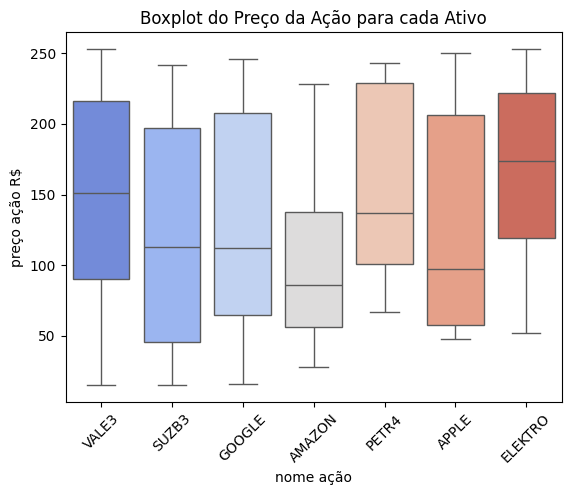

C:\Users\dsadm\AppData\Local\Temp\ipykernel_17968\257228037.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['nome ação'], y=df['valor de mercado R$ -(Bilhões)'], palette='muted')  # Usando a paleta 'muted'


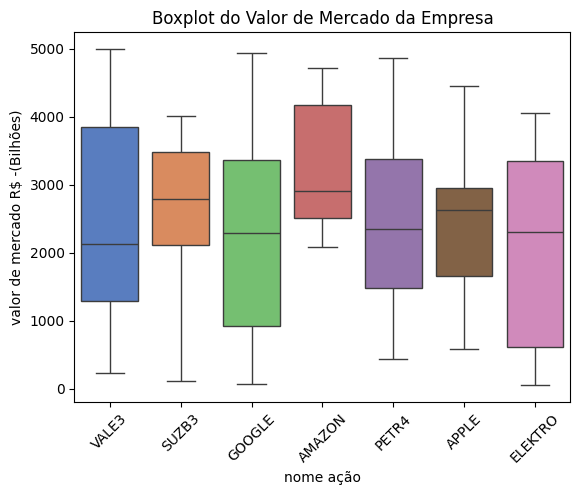

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot do preço da ação com cores personalizadas
sns.boxplot(x=df['nome ação'], y=df['preço ação R$'], palette='coolwarm')  # Usando uma paleta 'coolwarm'
plt.title('Boxplot do Preço da Ação para cada Ativo')
plt.xticks(rotation=45)  # Rotaciona os rótulos para melhor visualização
plt.show()

# Boxplot do valor de mercado da empresa com cores personalizadas
sns.boxplot(x=df['nome ação'], y=df['valor de mercado R$ -(Bilhões)'], palette='muted')  # Usando a paleta 'muted'
plt.title('Boxplot do Valor de Mercado da Empresa')
plt.xticks(rotation=45)  # Rotaciona os rótulos
plt.show()



In [40]:
# Verificar valores ausentes
df.isnull().sum()


nome ação                         0
preço ação R$                     0
qtde cotas                        0
valor de mercado R$ -(Bilhões)    0
dtype: int64

In [41]:
# Codificando a variável categórica 'nome ação' em variáveis dummy (binárias)
df_encoded = pd.get_dummies(df, columns=['nome ação'], drop_first=True)

# Exibir as primeiras linhas do DataFrame para verificar
df_encoded.head()


,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões),nome ação_APPLE,nome ação_ELEKTRO,nome ação_GOOGLE,nome ação_PETR4,nome ação_SUZB3,nome ação_VALE3
0,194,45,2134,False,False,False,False,False,True
1,91,71,3069,False,False,False,False,True,False
2,165,41,2815,False,False,False,False,True,False
3,56,34,3613,False,False,False,False,True,False
4,212,9,2975,False,False,True,False,False,False


In [42]:
from sklearn.preprocessing import MinMaxScaler

# Selecionar as colunas numéricas
features = df_encoded[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]

# Inicializar o escalador MinMax
scaler = MinMaxScaler()

# Aplicar a normalização nos dados
features_scaled = scaler.fit_transform(features)

# Criar um DataFrame com os dados normalizados
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)

# Exibir as primeiras linhas do DataFrame normalizado
df_scaled.head()


,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,0.752101,0.452632,0.421372
1,0.319328,0.726316,0.610605
2,0.630252,0.410526,0.559199
3,0.172269,0.336842,0.720704
4,0.827731,0.073684,0.591581


In [43]:
# Concatenar os dados normalizados com as variáveis dummy
df_final = pd.concat([df_scaled, df_encoded.drop(columns=['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)'])], axis=1)

# Exibir as primeiras linhas do DataFrame final
df_final.head()


,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões),nome ação_APPLE,nome ação_ELEKTRO,nome ação_GOOGLE,nome ação_PETR4,nome ação_SUZB3,nome ação_VALE3
0,0.752101,0.452632,0.421372,False,False,False,False,False,True
1,0.319328,0.726316,0.610605,False,False,False,False,True,False
2,0.630252,0.410526,0.559199,False,False,False,False,True,False
3,0.172269,0.336842,0.720704,False,False,False,False,True,False
4,0.827731,0.073684,0.591581,False,False,True,False,False,False


In [44]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecionando as colunas numéricas para o K-Means
features = df_encoded[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]

# Criando o modelo KMeans com 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
df_encoded['Cluster'] = kmeans.fit_predict(features)

# Verificando os primeiros registros com os clusters atribuídos
print(df_encoded.head())


   preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  nome ação_APPLE  \
0            194          45                            2134            False   
1             91          71                            3069            False   
2            165          41                            2815            False   
3             56          34                            3613            False   
4            212           9                            2975            False   

   nome ação_ELEKTRO  nome ação_GOOGLE  nome ação_PETR4  nome ação_SUZB3  \
0              False             False            False            False   
1              False             False            False             True   
2              False             False            False             True   
3              False             False            False             True   
4              False              True            False            False   

   nome ação_VALE3  Cluster  
0             True        

In [45]:
#4-(a) Alterar o número de clusters para 5
# Criando o modelo KMeans com 5 clusters

kmeans_5 = KMeans(n_clusters=5, random_state=0)
df_encoded['Cluster_5'] = kmeans_5.fit_predict(features)

# Verificando os primeiros registros com os clusters atribuídos
print(df_encoded.head())


   preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  nome ação_APPLE  \
0            194          45                            2134            False   
1             91          71                            3069            False   
2            165          41                            2815            False   
3             56          34                            3613            False   
4            212           9                            2975            False   

   nome ação_ELEKTRO  nome ação_GOOGLE  nome ação_PETR4  nome ação_SUZB3  \
0              False             False            False            False   
1              False             False            False             True   
2              False             False            False             True   
3              False             False            False             True   
4              False              True            False            False   

   nome ação_VALE3  Cluster  Cluster_5  
0             T

In [46]:
#4-(b) Alterar o número de clusters para 8
# Criando o modelo KMeans com 8 clusters
kmeans_8 = KMeans(n_clusters=8, random_state=0)
df_encoded['Cluster_8'] = kmeans_8.fit_predict(features)

# Verificando os primeiros registros com os clusters atribuídos
print(df_encoded.head())

   preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  nome ação_APPLE  \
0            194          45                            2134            False   
1             91          71                            3069            False   
2            165          41                            2815            False   
3             56          34                            3613            False   
4            212           9                            2975            False   

   nome ação_ELEKTRO  nome ação_GOOGLE  nome ação_PETR4  nome ação_SUZB3  \
0              False             False            False            False   
1              False             False            False             True   
2              False             False            False             True   
3              False             False            False             True   
4              False              True            False            False   

   nome ação_VALE3  Cluster  Cluster_5  Cluster_8  
0   

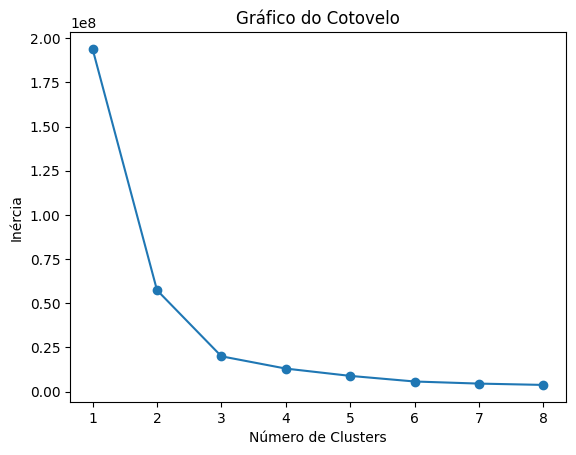

In [47]:
#4-(c) Plotar o gráfico do Cotovelo
from sklearn.cluster import KMeans

# Listando o número de clusters de 1 a 8
inertia = []
for n_clusters in range(1, 9):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Plotando o gráfico do cotovelo
plt.plot(range(1, 9), inertia, marker='o')
plt.title('Gráfico do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()


Silhouette Score: 0.4992100586960756


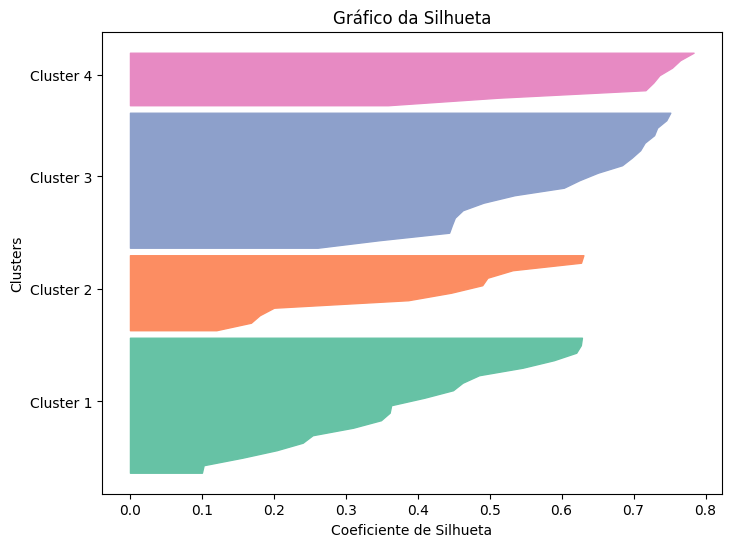

In [52]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculando o coeficiente de silhueta
sil_score = silhouette_score(features, kmeans.labels_)
print(f"Silhouette Score: {sil_score}")

# Plotando a silhueta para o modelo com 4 clusters
fig, ax = plt.subplots(figsize=(8, 6))

# Obtendo o coeficiente de silhueta para cada amostra
silhouette_vals = silhouette_samples(features, kmeans.labels_)

# Organizando os valores da silhueta para plotar
y_ticks = []
y_lower, y_upper = 0, 0

# Definindo uma paleta de cores personalizada
colors = sns.color_palette("Set2", n_colors=4)  # Usando uma paleta 'Set2' com 4 cores distintas

for i in range(4):  # Número de clusters
    cluster_silhouette_vals = silhouette_vals[kmeans.labels_ == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    
    # Preenchendo a área com a cor correspondente ao cluster
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, color=colors[i])
    
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

# Configuração dos ticks e rótulos
ax.set_yticks(y_ticks)
ax.set_yticklabels([f'Cluster {i+1}' for i in range(4)])
ax.set_title("Gráfico da Silhueta")
ax.set_xlabel("Coeficiente de Silhueta")
ax.set_ylabel("Clusters")

# Exibindo o gráfico
plt.show()



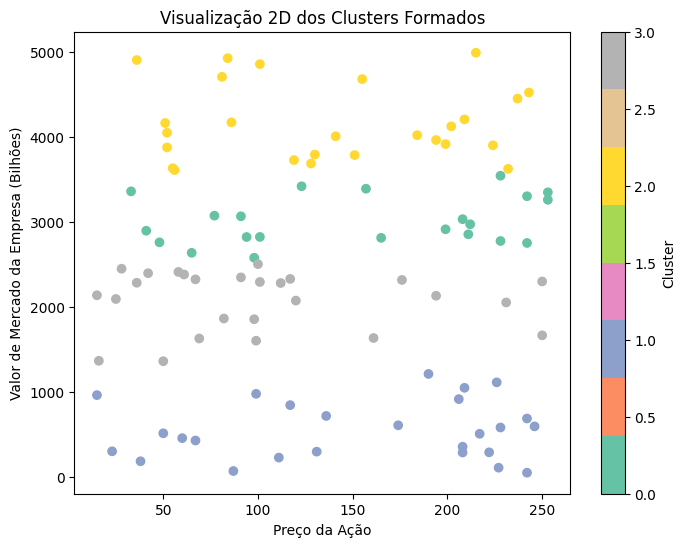

In [57]:
#5-a) Visualização 2D dos Clusters Formados
import matplotlib.pyplot as plt

# Visualização 2D dos Clusters Formados com nova paleta de cores
plt.figure(figsize=(8, 6))

# Usando uma paleta personalizada para os clusters
plt.scatter(df_encoded['preço ação R$'], df_encoded['valor de mercado R$ -(Bilhões)'], 
            c=df_encoded['Cluster'], cmap='Set2')  # Alterando para a paleta 'Set2' do Seaborn

plt.title('Visualização 2D dos Clusters Formados')
plt.xlabel('Preço da Ação')
plt.ylabel('Valor de Mercado da Empresa (Bilhões)')
plt.colorbar(label='Cluster')  # Adicionando barra de cores com rótulo
plt.show()



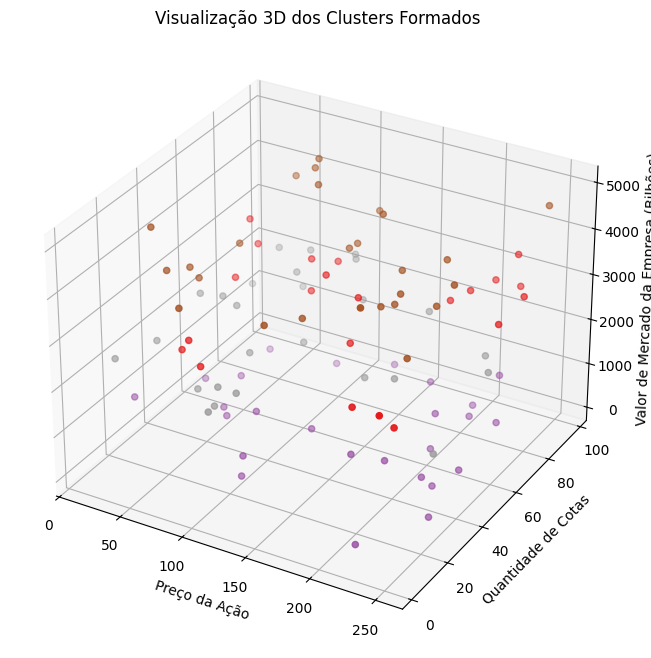

In [58]:
#5-b) Visualização 3D dos Clusters Formados
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Criando uma figura 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotando os clusters em 3D com nova paleta de cores
ax.scatter(df_encoded['preço ação R$'], 
           df_encoded['qtde cotas'], 
           df_encoded['valor de mercado R$ -(Bilhões)'], 
           c=df_encoded['Cluster'], cmap='Set1')  # Alterando para a paleta 'Set1' (ou 'plasma')

# Títulos e rótulos
ax.set_title('Visualização 3D dos Clusters Formados')
ax.set_xlabel('Preço da Ação')
ax.set_ylabel('Quantidade de Cotas')
ax.set_zlabel('Valor de Mercado da Empresa (Bilhões)')

plt.show()



In [51]:
#5)A maior vantagem do aprendizado não supervisionado é que ele não requer dados 
# rotulados. Isso permite analisar grandes volumes de dados sem a necessidade de 
# rotular manualmente as informações, o que pode ser caro e demorado. Além disso, o
#  aprendizado não supervisionado é eficaz para descobrir padrões ocultos ou 
# agrupamentos nos dados, sem um objetivo específico pré-definido, proporcionando 
# flexibilidade para explorar e entender os dados de maneira mais ampla.